# Linear Regression
-----------------------------------------
### Estimate height of boys based on their age

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

In [2]:
# convert data into array
def FileToArray(file):
    filet = open(file, 'r')
    Array = []
    for line in filet:       
        num,ex = line.split("e")
        G = float(num)*10**float(ex)
        Array.append(G)
    return Array


def Convert2d(a1,a2):
    a = np.stack((a1,a2),axis=1)
    return a

## The Data

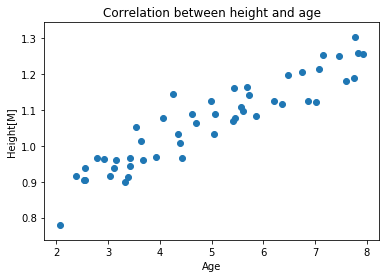

In [3]:
X = FileToArray("ex2x.dat")
Y = FileToArray("ex2y.dat")
data = Convert2d(X,Y)
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Age')
plt.ylabel('Height[M]')
plt.title('Correlation between height and age')



---
some useful functions

In [4]:
# m is slope | c is y-intersept
def Function(X,m,c):
    X = float(X)
    m = float(m)
    c = float(c)
    Y = m * X + c
    
    return Y

In [5]:
def slope(p1,p2):
    np.array(p1)
    np.array(p2)
    diff = np.subtract(p2,p1)
    m = diff[1]/diff[0]
    return m
def Yinter(p1,p2):
    m = slope(p1,p2)
    c = p1[1]-m*p1[0]
    return c

In [6]:
def getLine(p1,p2):
    m = slope(p1,p2)
    c = p1[1]-m*p1[0]
    return m, c

In [7]:
def plotData(P,L):
    plt.scatter(P[:,0],P[:,1])
    plt.xlabel('Age')
    plt.ylabel('Height[M]')
    plt.title('Correlation between height and age')


determine the squared distance of point and graph

In [8]:
# P = [x,y] | L = [m,c]
def SqDistPL(P,L):
    Yp = P[1]
    Yl = Function(P[0],L[0],L[1])
    D = (Yl - Yp)**2
    return D
    
    

## loss function:
describes how good the data is represented by the Graph

In [9]:
def Loss(Points,L):
    J = 0
    for P in Points:
        tmp = SqDistPL(P,L)
        J += tmp
    return J        

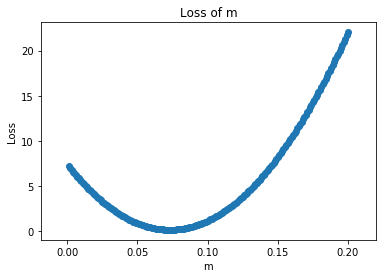

In [10]:
def plotLossm(data,c,Range=[-2,2],step=0.2):
    # has to be 1st negative 2nd positive or 0
    neg = 0-Range[0]
    negX = (neg/step)+1
    positive = 0+Range[1]
    posX = ((positive)/step)+1
    posX = int(posX)
    negX = int(negX)
    xs =[]
    for i in range(1,negX):
        xs.append(("%.3f" % -(i*step)))
    for s in range(1,posX):
        xs.append(("%.3f" % (s*step)))        
    ys = []
    for x in xs:
        ys.append(Loss(data,[x,c]))
    a=Convert2d(xs,ys)
    return a
        
        
        
    
    
a = plotLossm(data,0.7,Range=[0,0.2],step=0.001)
plt.scatter(a[:,0],a[:,1])
plt.xlabel('m')
plt.ylabel('Loss')
plt.title('Loss of m')


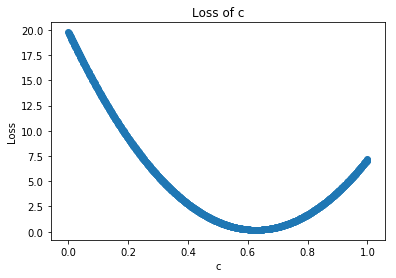

In [11]:
def plotLossc(data,m,Range=[-2,2],step=0.2):
    # has to be 1st negative 2nd positive or 0
    neg = 0-Range[0]
    negX = (neg/step)+1
    positive = 0+Range[1]
    posX = ((positive)/step)+1
    posX = int(posX)
    negX = int(negX)
    xs =[]
    for i in range(1,negX):
        xs.append(("%.3f" % -(i*step)))
    for s in range(1,posX):
        xs.append(("%.3f" % (s*step)))        
    ys = []
    for x in xs:
        ys.append(Loss(data,[m,x]))
    a=Convert2d(xs,ys)
    return a
        
        
    
    
g = plotLossc(data,0.089,Range=[0,1],step=0.001)
plt.scatter(g[:,0],g[:,1])
plt.xlabel('c')
plt.ylabel('Loss')
plt.title('Loss of c')


---
## The Algorithm
---
###  create an initial line
through two most extreme points

In [12]:
def randLine(Points):
    ## if sorted
    p1 = Points[0]
    p2 = Points[-1]
    m,c = getLine(p1,p2)
    return m,c

### determine the rate of change in loss 

In [13]:
def changeJm(Points,m,c,step=0.01):
    o = Loss(Points,[m,c])
    a = Loss(Points,[m+step,c])
    change,waste = getLine([m,o],[m+step,a])
    return change


def changeJc(Points,m,c,step=0.01):
    o = Loss(Points,[m,c])
    a = Loss(Points,[m,c+step])
    change,waste = getLine([c,o],[c+step,a])
    return change

### descend the Loss function by a set amount

In [14]:
def descendM(Points,m,c,step=0.0001):
    if changeJm(Points,m,c) < 0:
        M = m + step 
    else:
        M = m - step
    return M


def descendC(Points,m,c,step=0.0001):
    if changeJc(Points,m,c) < 0:
        C = c + step 
    else:
        C = c - step
    return C

### repeat over with more and more accuracy

In [15]:
def findMinM(Points,m,c,acc=4):
    Min = m
    for a in range(acc):
        z = 100**-a
        #for i in range(iterations):
        while True:
            tmp = descendM(Points,Min,c,step = z)
            if Loss(Points,[tmp,c]) < Loss(Points,[Min,c]):
                Min = tmp
            else:
                break
    return Min


def findMinC(Points,m,c,acc=4):
    Min = c
    for a in range(acc):
        z = 100**-a
        #for i in range(iterations):
        while True:
            tmp = descendC(Points,m,Min,step = z)
            if Loss(Points,[m,tmp]) < Loss(Points,[m,Min]):
                Min = tmp
            else:
                break
    return Min
 
def Optimize(Points,its=75,acc=10,show_loading_bar = False):
    M,C = randLine(Points)   
    iterator = tnrange if show_loading_bar else range
    for i in iterator(its):
        M = findMinM(Points,M,C,acc)
        C = findMinC(Points,M,C,acc)
    return M,C

---
## Using it on our data
---

Slope: 0.0715084451113 
C: 0.708078581942


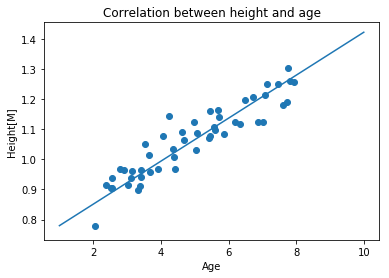

In [16]:
#find best slope and y-intersept
Z,G = Optimize(data,show_loading_bar=False)

#create points to plot
t = [1,10]
v = [Function(1,Z,G),Function(10,Z,G)]


plt.scatter(data[:,0],data[:,1])#plot data
plt.plot(t,v)                   #plot line

print("Slope:",Z,"\nC:",G)
plt.xlabel('Age')
plt.ylabel('Height[M]')
plt.title('Correlation between height and age')


---
## Bonus: New Data

In [20]:
def ToyData(m,c,spread=1,length=10,dist=1, size=31):
    S = [[2,2]]
    for l in range(length):
        s = (spread * np.random.randn(size, 2))
        s[:,0] += l*dist
        s[:,1] += Function(l*dist,m,c)
        S = np.concatenate((S,s))
        
    S = S[1:]
    return S

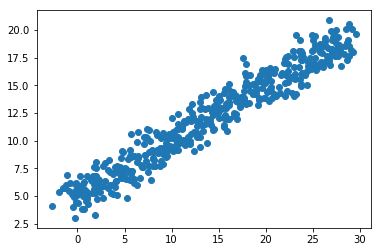

In [21]:
m = 0.5
c = 5

S = ToyData(m,c,spread=1,length=15, dist =2 )
plt.scatter(S[:,0],S[:,1])



Slope: 0.489087400965 
C: 5.16885754683

real
Slope: 0.5 
C: 5


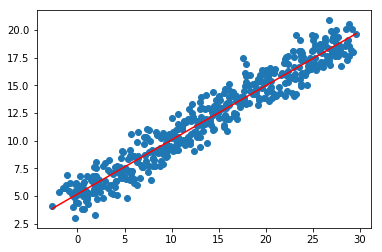

In [22]:

M,C=Optimize(S,show_loading_bar=True)

#boundaries for line
lowx = min(S[:,0])
hix = max(S[:,0])


t = [lowx,hix]
v = [Function(lowx,M,C),Function(hix,M,C)]
plt.scatter(S[:,0],S[:,1])
plt.plot(t,v,"r")
print("Slope:",M,"\nC:",C)
print("\nreal\nSlope:",m,"\nC:",c)
